In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
data=pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")

In [3]:
data.describe(percentiles=[0.03,0.90,0.97])

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
3%,2.020071e+07,3.015351e+07,25.000000,10.000000,0.430000,876.000000,6.119930e+05,2.020070e+07,4.800000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
90%,2.021031e+07,3.034570e+07,78.000000,42.000000,6.000000,1500.000000,1.670799e+09,2.021070e+07,1.091000e+03
97%,2.021032e+07,3.039763e+07,84.000000,59.000000,10.000000,2000.000000,1.671864e+09,2.021070e+07,1.248594e+03
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [4]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
#converting improper data formate of material_ref into proper formate
data['material_ref'] = data['material_ref'].str.lstrip('0')
#filling na's with unknown
data['material_ref'].fillna('unknown', inplace=True)
#droping the na's
data = data.dropna()

In [6]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00


In [7]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [8]:
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [9]:
#converting str to correct data formate
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['item_date']=pd.to_datetime(data['item_date'],format='%Y%m%d',errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce')
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')

In [10]:
data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [11]:
data.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181634,1.816350e+05,1.816360e+05,181636.000000,181636.000000,181636.000000,181636.000000,1.816360e+05,181634,1.816360e+05
mean,2020-11-26 23:02:13.706244352,5.876103e+03,3.023251e+07,44.893270,25.616188,2.564160,1295.266159,4.740377e+08,2021-01-25 22:48:41.717299200,1.918339e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.096843e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036395e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716187e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349320e+06,1.005619e+05,24.404311,17.754070,6.572553,261.641853,7.175406e+08,NaN,3.318285e+05


In [12]:
#removing negative values
data1=data.copy()
a = data1['selling_price'] <= 0
print(a.sum())
data1.loc[a, 'selling_price'] = np.nan

a = data1['quantity tons'] <= 0
print(a.sum())
data1.loc[a, 'quantity tons'] = np.nan

a = data1['thickness'] <= 0
print(a.sum())

7
4
0


In [13]:
data1.isnull().sum()

id               0
item_date        2
quantity tons    5
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    2
selling_price    7
dtype: int64

In [14]:
data1.dropna(inplace=True)

In [15]:
data1.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181620,1.816200e+05,1.816200e+05,181620.000000,181620.000000,181620.000000,181620.000000,1.816200e+05,181620,1.816200e+05
mean,2020-11-26 23:01:19.207135744,5.876596e+03,3.023251e+07,44.894009,25.615571,2.550501,1295.269480,4.740204e+08,2021-01-25 22:48:39.960356608,1.918487e+03
min,2020-07-02 00:00:00,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,1.000000e-01
25%,2020-09-29 00:00:00,1.096871e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.750000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036409e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716332e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349418e+06,1.005651e+05,24.404547,17.753855,2.976518,261.650874,7.175358e+08,NaN,3.318431e+05


In [17]:
#checking for data skwness
def plot(data1, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=data1, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=data1, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=data1, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

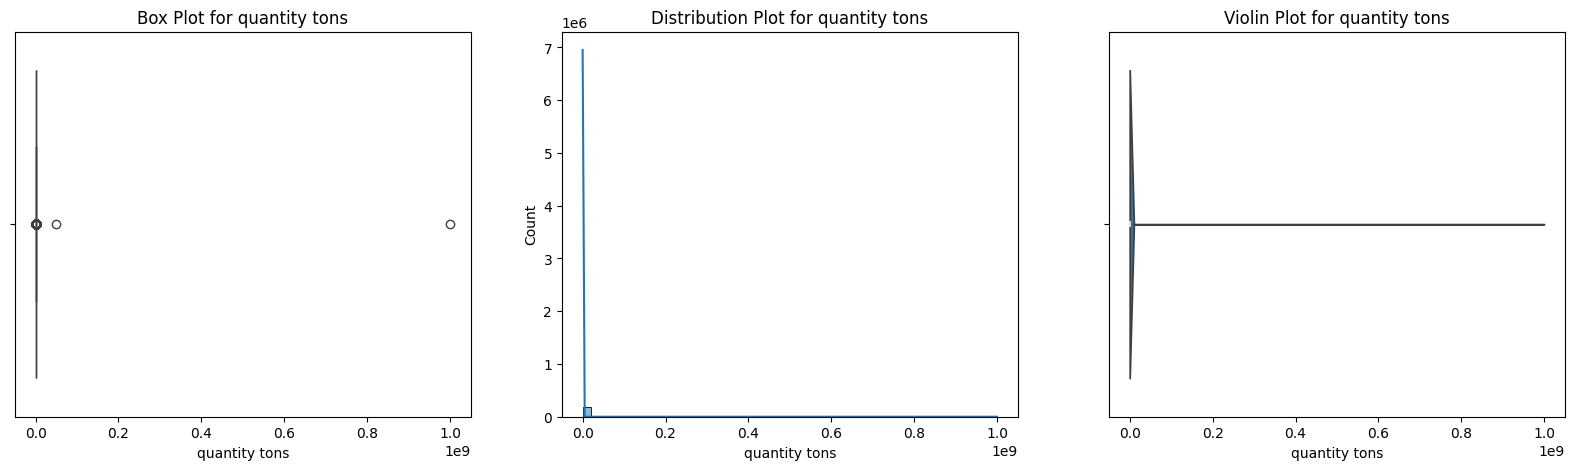

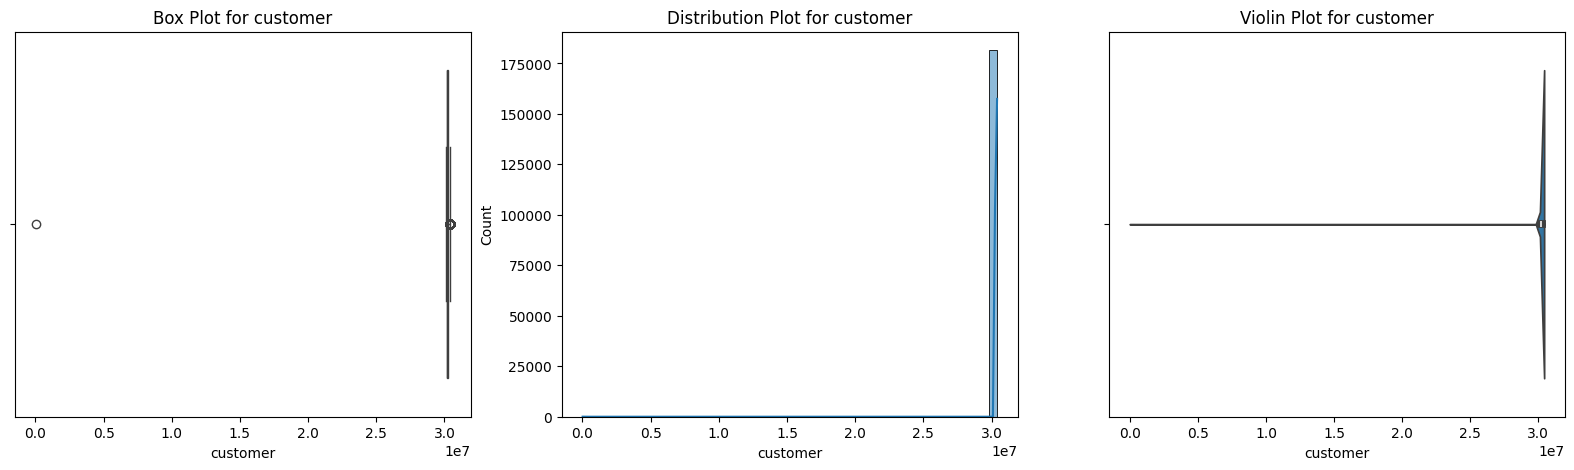

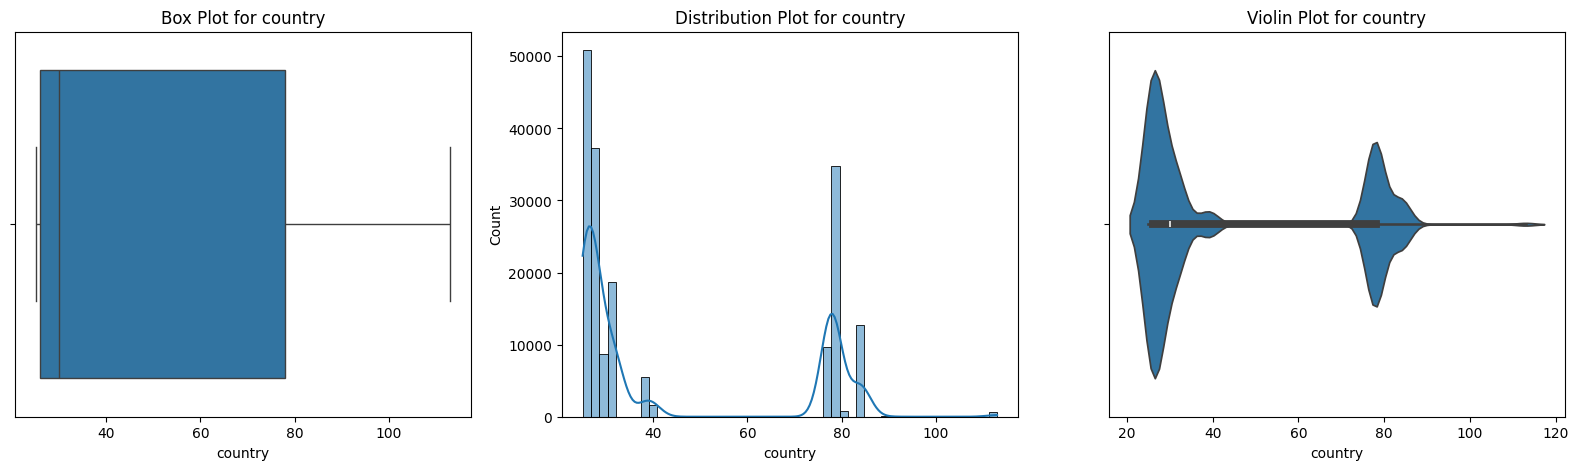

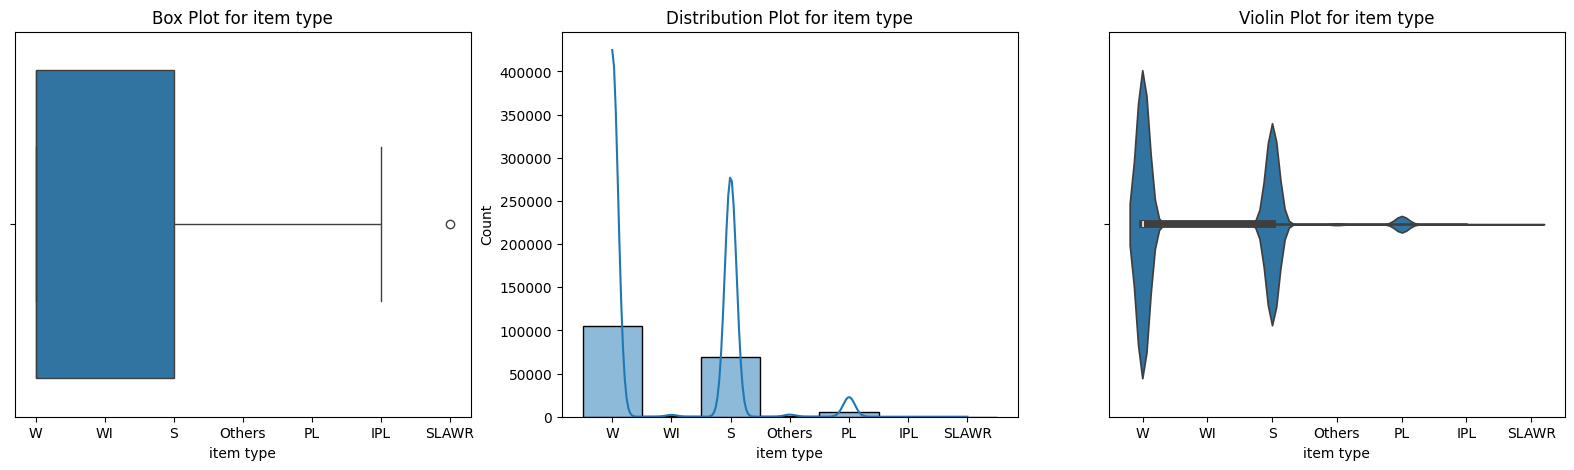

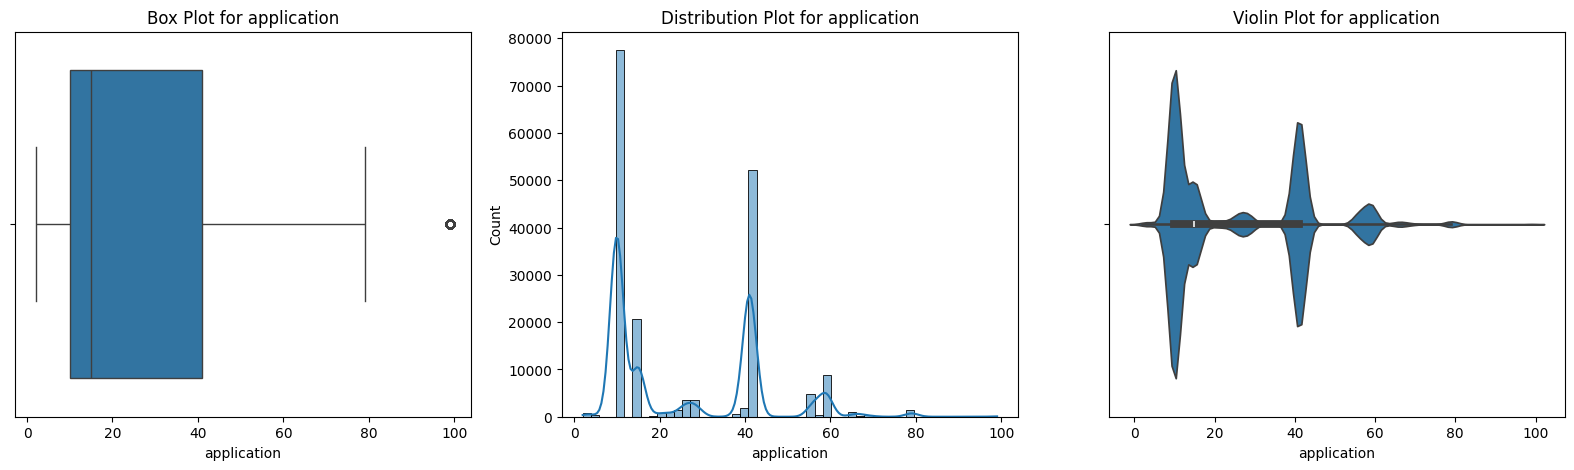

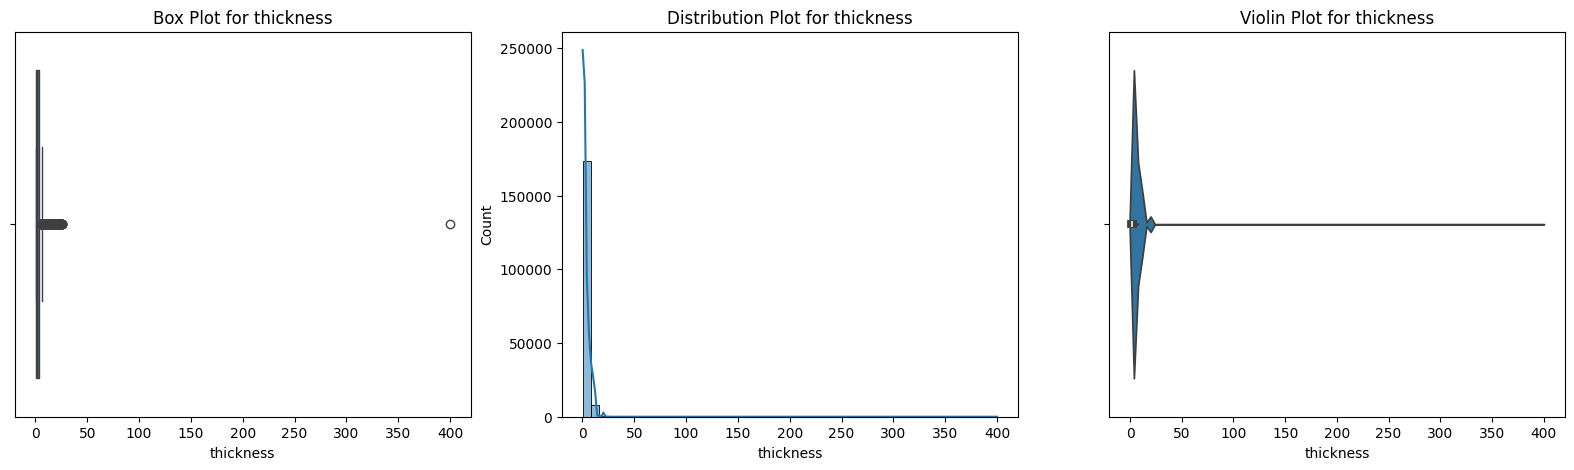

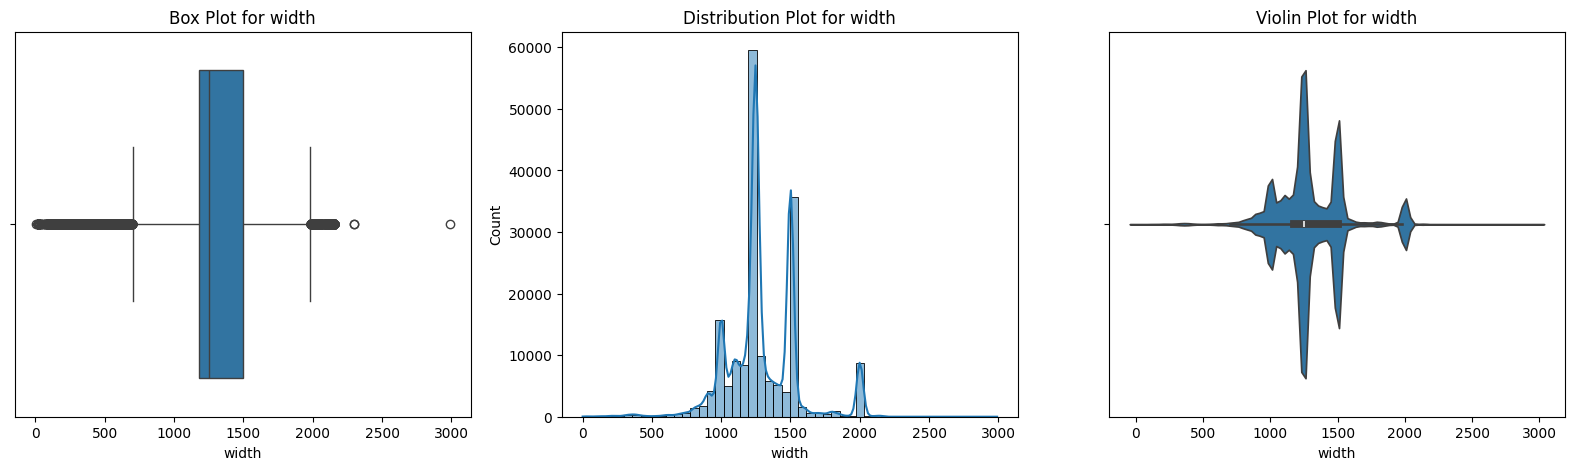

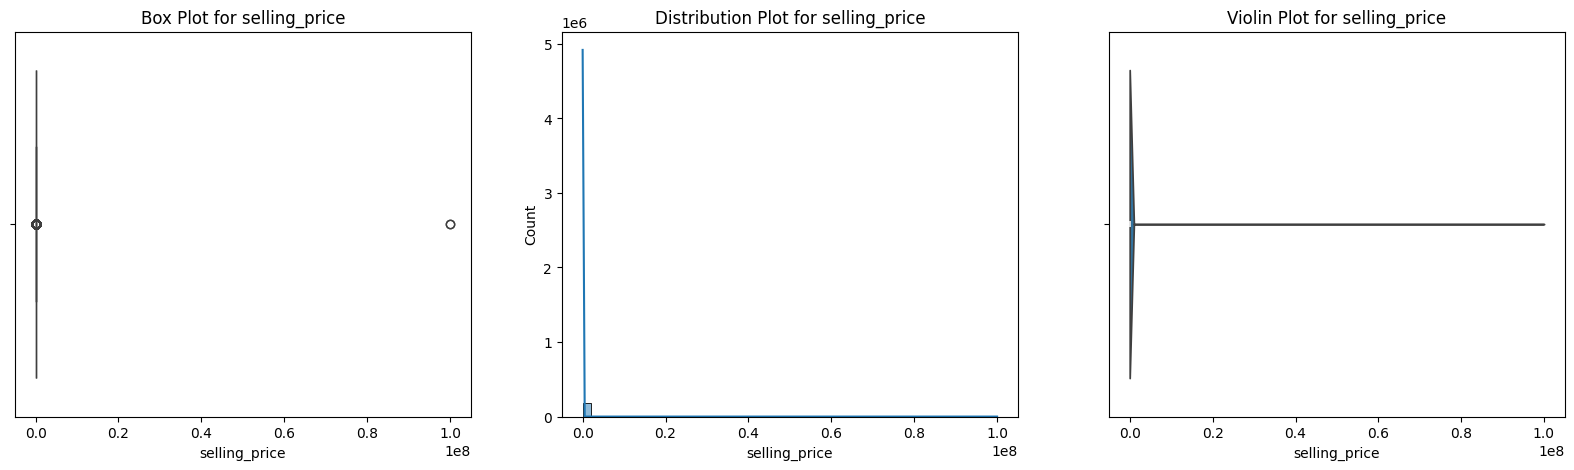

In [18]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(data1, i)

In [19]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

data2 = data1.copy()
data2['quantity tons_log'] = np.log(data2['quantity tons'])
data2['thickness_log'] = np.log(data2['thickness'])
data2['selling_price_log'] = np.log(data2['selling_price'])
data2.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
count,181620,1.816200e+05,1.816200e+05,181620.000000,181620.000000,181620.000000,181620.000000,1.816200e+05,181620,1.816200e+05,181620.000000,181620.000000,181620.000000
mean,2020-11-26 23:01:19.207135744,5.876596e+03,3.023251e+07,44.894009,25.615571,2.550501,1295.269480,4.740204e+08,2021-01-25 22:48:39.960356608,1.918487e+03,3.392019,0.480172,6.626299
min,2020-07-02 00:00:00,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,1.000000e-01,-11.512925,-1.714798,-2.302585
25%,2020-09-29 00:00:00,1.096871e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.750000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02,2.395046,-0.356675,6.505784
50%,2020-11-30 00:00:00,3.036409e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02,3.413261,0.405465,6.699500
75%,2021-02-03 00:00:00,6.716332e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02,4.207127,1.098612,6.859615
max,2021-04-01 00:00:00,1.000000e+09,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08,20.723266,5.991465,18.420691
std,NaN,2.349418e+06,1.005651e+05,24.404547,17.753855,2.976518,261.650874,7.175358e+08,NaN,3.318431e+05,1.444974,0.933528,0.564058


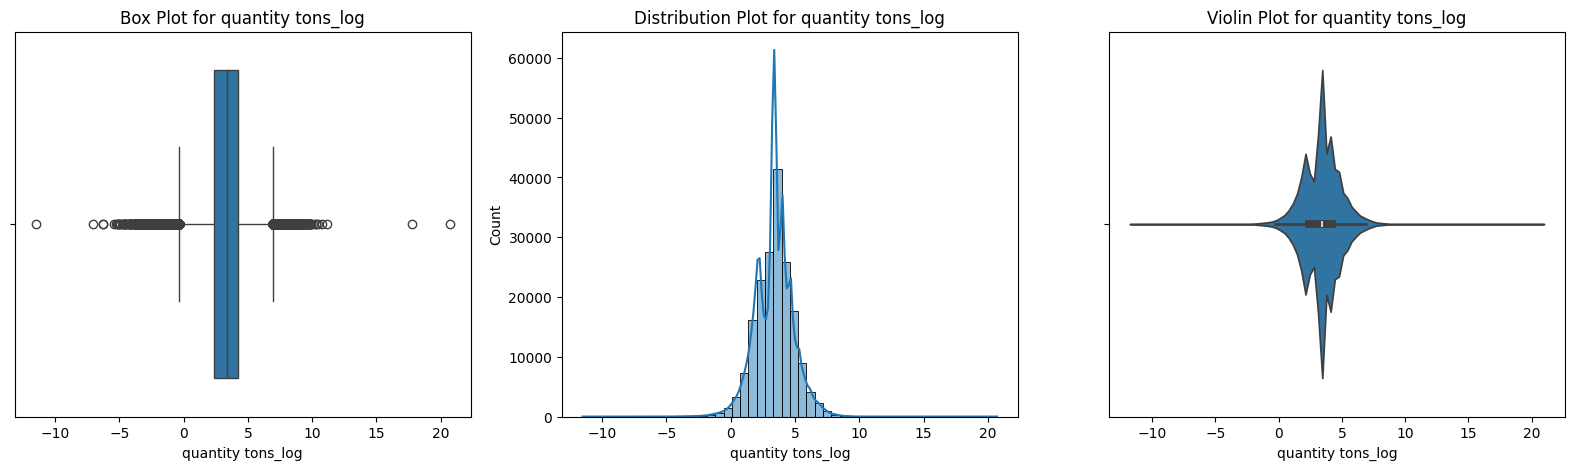

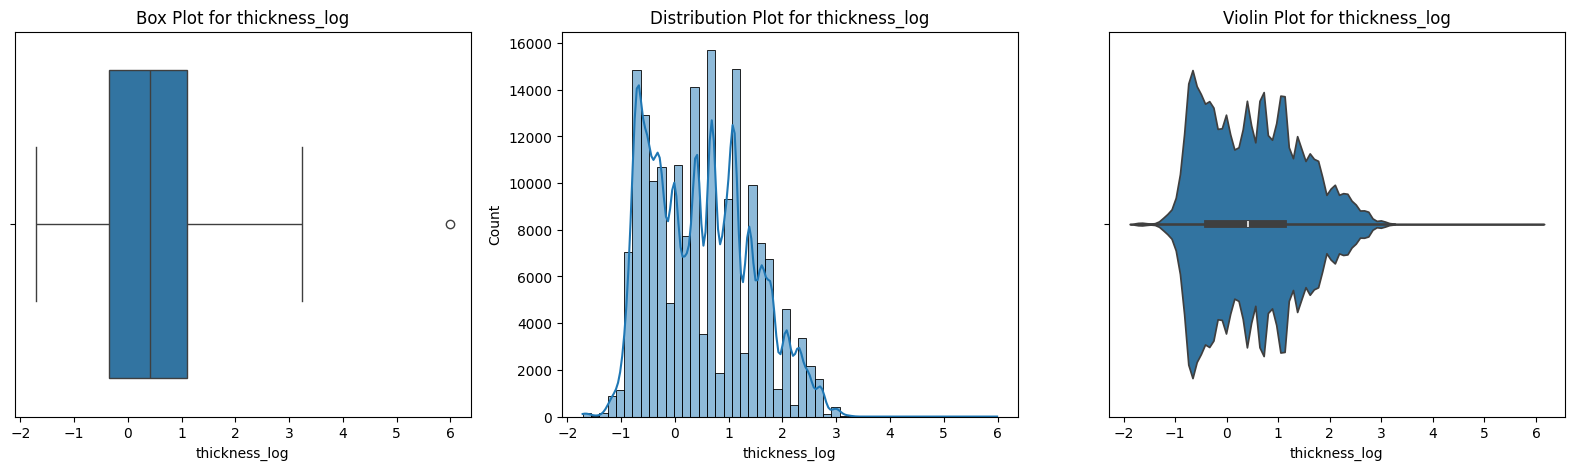

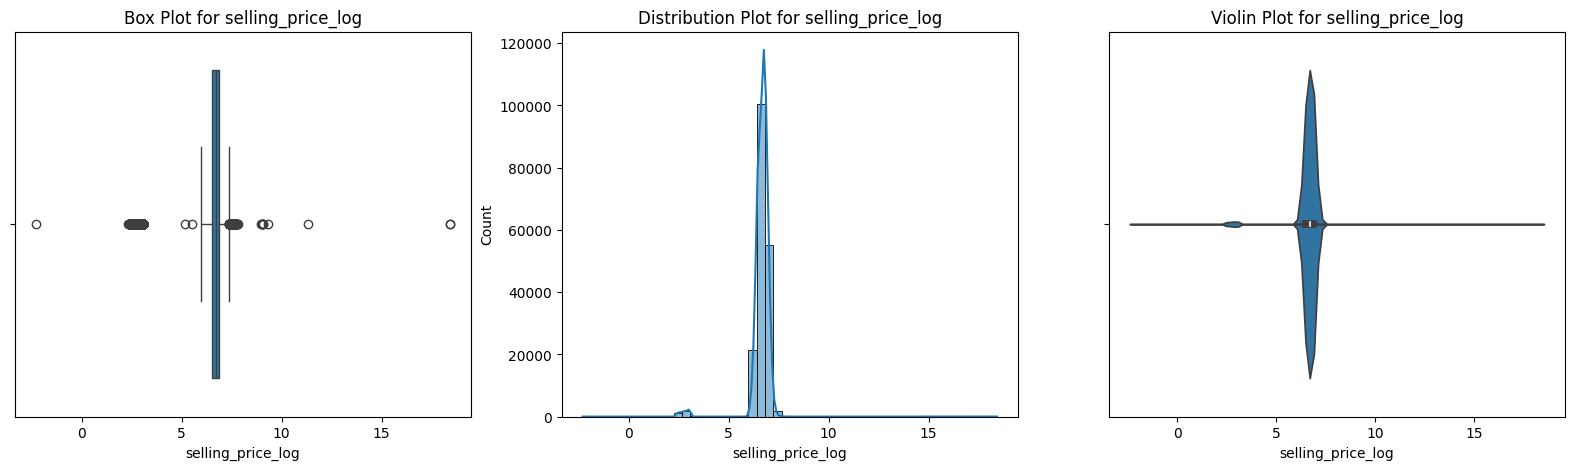

In [20]:
for i in ['quantity tons_log', 'thickness_log', 'selling_price_log']:
    plot(data2, i)

In [21]:
data3 = data2.copy()
data3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105


In [22]:
#droping extra columns
data3.drop(columns=['id','thickness','selling_price','quantity tons'],axis=1,inplace=True)

In [23]:
#creating new feature 'date difference'
data3['Date_difference'] = (data3['delivery date'] - data3['item_date']).dt.days

In [24]:
data3

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931,91
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211,-90
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90
4,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25.0,Won,W,41.0,1240.0,1000222,164141591,2020-07-01,4.670802,-0.040822,6.400257,-1
181668,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,4.629691,-0.040822,6.381816,-1
181669,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,5.337954,-0.051293,6.378426,-1
181670,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,1.443523,-0.342490,6.428105,-1


In [25]:
# split the day, month, and year from 'item_date_1' column and add dataframe
data3['item_date_day'] = data3['item_date'].dt.day
data3['item_date_month'] = data3['item_date'].dt.month
data3['item_date_year'] = data3['item_date'].dt.year
data3

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25.0,Won,W,41.0,1240.0,1000222,164141591,2020-07-01,4.670802,-0.040822,6.400257,-1,2,7,2020
181668,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
181669,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
181670,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020


In [26]:
data3.describe(percentiles=[0.01,0.95,0.99])

,item_date,customer,country,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
count,181620,1.816200e+05,181620.000000,181620.000000,181620.000000,1.816200e+05,181620,181620.000000,181620.000000,181620.000000,181620.000000,181620.000000,181620.000000,181620.000000
mean,2020-11-26 23:01:19.207135744,3.023251e+07,44.894009,25.615571,1295.269480,4.740204e+08,2021-01-25 22:48:39.960356608,3.392019,0.480172,6.626299,59.991212,15.114503,6.722173,2020.390293
min,2020-07-02 00:00:00,1.245800e+04,25.000000,2.000000,1.000000,6.117280e+05,2019-04-01 00:00:00,-11.512925,-1.714798,-2.302585,-689.000000,1.000000,1.000000,2020.000000
1%,2020-07-06 00:00:00,3.014859e+07,25.000000,10.000000,678.000000,6.119930e+05,2020-07-01 00:00:00,-0.254774,-1.021651,2.890372,-54.000000,1.000000,1.000000,2020.000000
50%,2020-11-30 00:00:00,3.020524e+07,30.000000,15.000000,1250.000000,6.406650e+05,2021-01-01 00:00:00,3.413261,0.405465,6.699500,60.000000,15.000000,8.000000,2020.000000
95%,2021-03-22 00:00:00,3.039364e+07,84.000000,59.000000,1950.000000,1.670799e+09,2021-07-01 00:00:00,5.734914,2.079442,7.074963,133.000000,29.000000,12.000000,2021.000000
99%,2021-03-30 00:00:00,3.040337e+07,84.000000,68.000000,2000.000000,1.693868e+09,2021-08-01 00:00:00,7.025352,2.707383,7.225481,149.000000,31.000000,12.000000,2021.000000
max,2021-04-01 00:00:00,3.040818e+07,113.000000,99.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,20.723266,5.991465,18.420691,448.000000,31.000000,12.000000,2021.000000
std,NaN,1.005651e+05,24.404547,17.753855,261.650874,7.175358e+08,NaN,1.444974,0.933528,0.564058,46.816752,8.765511,3.957381,0.487817


In [27]:
#function for handeling outlayers
def outlier(df, column):
    iqr = df[column].quantile(0.85) - df[column].quantile(0.15)
    upper_threshold = df[column].quantile(0.85) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.15) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)


In [28]:
#handling outlayers
outlier(data3, 'quantity tons_log')
outlier(data3, 'thickness_log')
outlier(data3, 'selling_price_log')
outlier(data3, 'width')

In [29]:
data3.describe(percentiles=[0.01,0.95,0.99])

,item_date,customer,country,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
count,181620,1.816200e+05,181620.000000,181620.000000,181620.000000,1.816200e+05,181620,181620.000000,181620.000000,181620.000000,181620.000000,181620.000000,181620.000000,181620.000000
mean,2020-11-26 23:01:19.207135744,3.023251e+07,44.894009,25.615571,1295.739015,4.740204e+08,2021-01-25 22:48:39.960356608,3.392848,0.480167,6.675147,59.991212,15.114503,6.722173,2020.390293
min,2020-07-02 00:00:00,1.245800e+04,25.000000,2.000000,360.000000,6.117280e+05,2019-04-01 00:00:00,-2.142289,-1.714798,5.632950,-689.000000,1.000000,1.000000,2020.000000
1%,2020-07-06 00:00:00,3.014859e+07,25.000000,10.000000,678.000000,6.119930e+05,2020-07-01 00:00:00,-0.254774,-1.021651,5.632950,-54.000000,1.000000,1.000000,2020.000000
50%,2020-11-30 00:00:00,3.020524e+07,30.000000,15.000000,1250.000000,6.406650e+05,2021-01-01 00:00:00,3.413261,0.405465,6.699500,60.000000,15.000000,8.000000,2020.000000
95%,2021-03-22 00:00:00,3.039364e+07,84.000000,59.000000,1950.000000,1.670799e+09,2021-07-01 00:00:00,5.734914,2.079442,7.074963,133.000000,29.000000,12.000000,2021.000000
99%,2021-03-30 00:00:00,3.040337e+07,84.000000,68.000000,2000.000000,1.693868e+09,2021-08-01 00:00:00,7.025352,2.707383,7.225481,149.000000,31.000000,12.000000,2021.000000
max,2021-04-01 00:00:00,3.040818e+07,113.000000,99.000000,2184.000000,1.722208e+09,2022-01-01 00:00:00,8.796207,4.920350,7.723036,448.000000,31.000000,12.000000,2021.000000
std,NaN,1.005651e+05,24.404547,17.753855,259.738740,7.175358e+08,NaN,1.437502,0.933497,0.275200,46.816752,8.765511,3.957381,0.487817


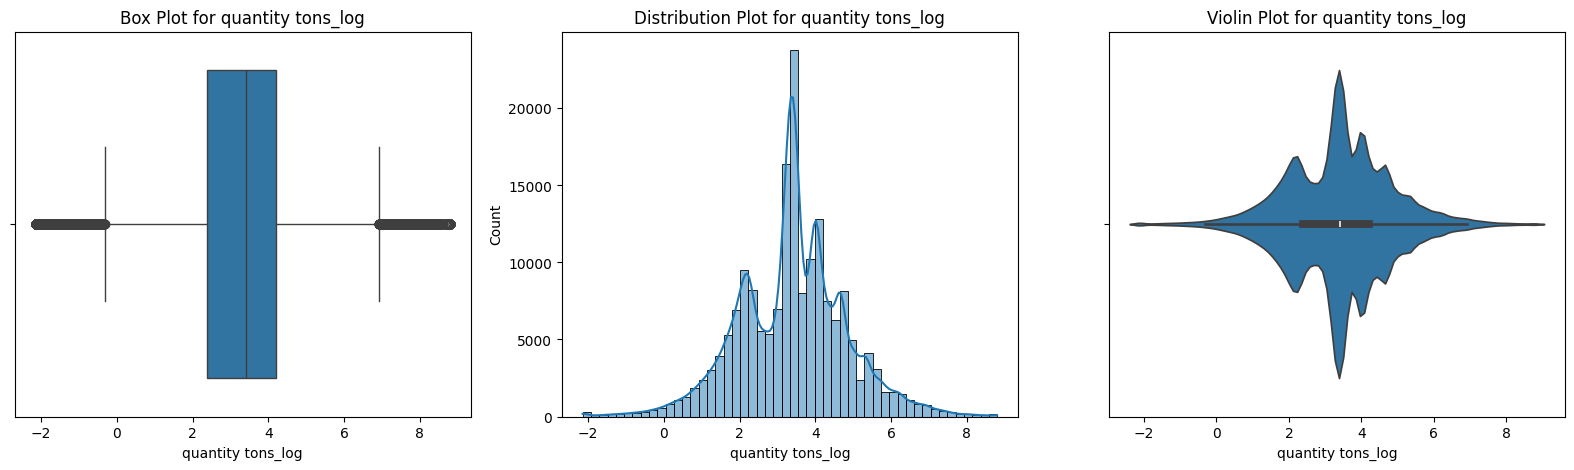

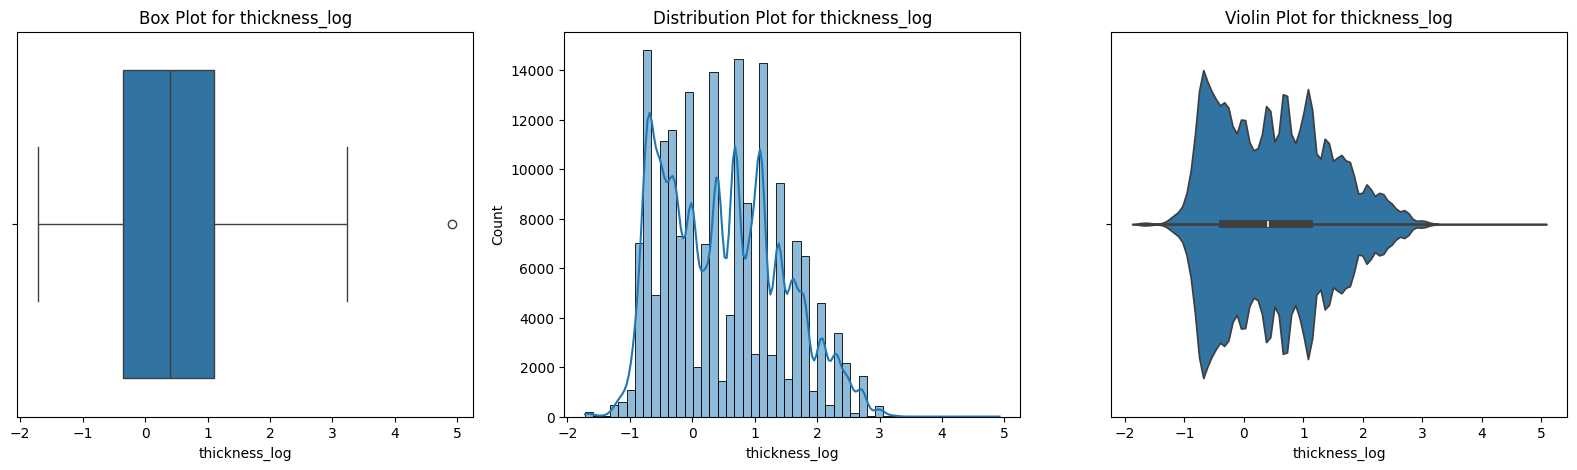

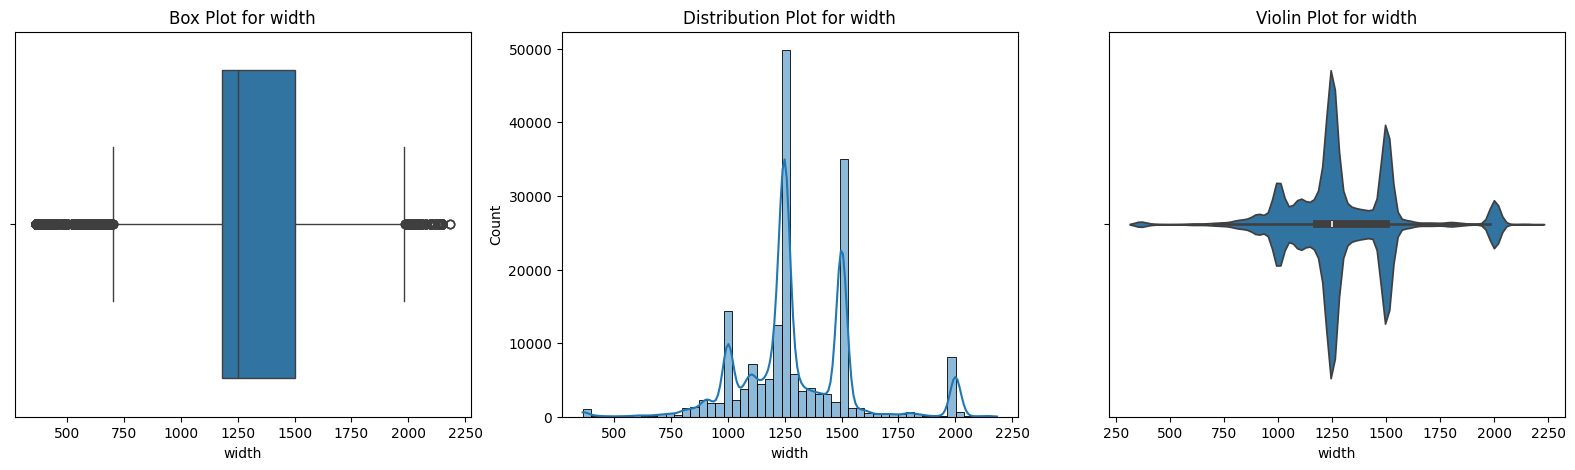

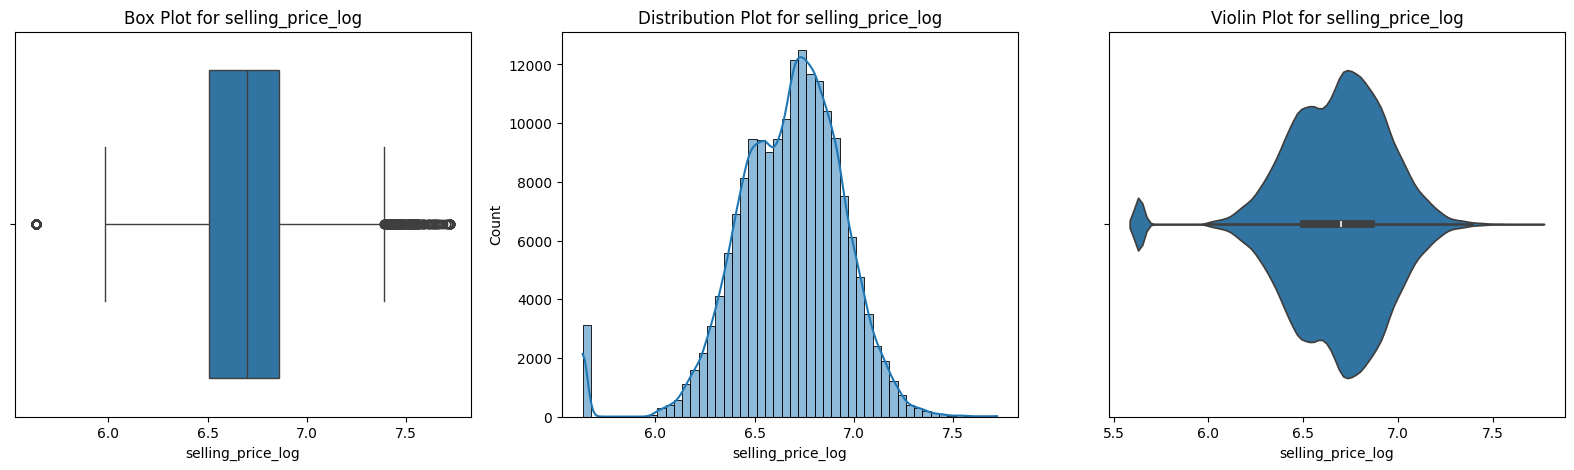

In [30]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(data3, i)

In [32]:
data4 = data3.copy()

In [33]:
#Encoding categorical columns
OE = OrdinalEncoder()
LE = LabelEncoder()

data4['item type'] = LE.fit_transform(data4[['item type']])
data4.status = OE.fit_transform(data4[['status']])

In [34]:
data4

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,7.0,5,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,2021-04-01,30202938.0,25.0,7.0,5,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,2021-04-01,30153963.0,30.0,7.0,6,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,2021-04-01,30349574.0,32.0,7.0,3,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,2021-04-01,30211560.0,28.0,7.0,5,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25.0,7.0,5,41.0,1240.0,1000222,164141591,2020-07-01,4.670802,-0.040822,6.400257,-1,2,7,2020
181668,2020-07-02,30200854.0,25.0,7.0,5,41.0,1220.0,1000777,164141591,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
181669,2020-07-02,30200854.0,25.0,7.0,5,41.0,1500.0,1000227,164141591,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
181670,2020-07-02,30200854.0,25.0,7.0,5,41.0,1250.0,1004216,164141591,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020


<Axes: >

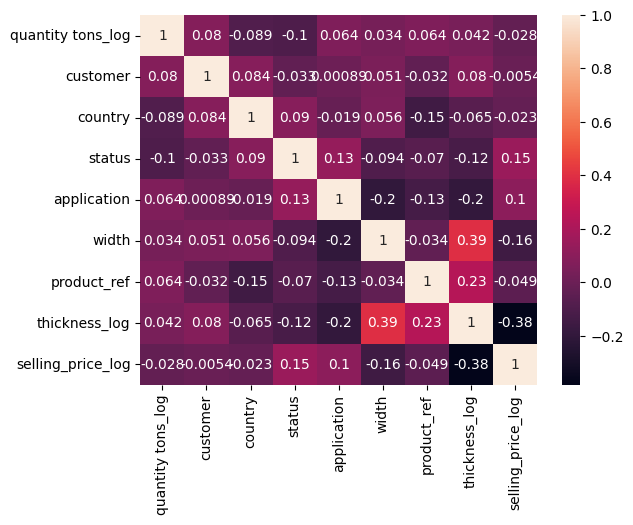

In [35]:
#Checking for correlation between columns
col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
data_heatmap = data4[col].corr()
sns.heatmap(data_heatmap, annot=True)

In [37]:
#Function for spliting Features and Columns
def load_data(data4,target_column):
  X = data4.drop(columns=[target_column,'item_date','delivery date','material_ref'])
  y = data4[target_column]
  return X,y

In [38]:
X,y = load_data(data4,'selling_price_log')

In [40]:
#Applying min max scaler to fratures
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [41]:
#Spliting train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =14)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 13)
(54486, 13)
(127134,)
(54486,)


In [44]:
#Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error: {rmse}")
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.12964946685522458
Mean Squared Error: 0.04129170578329088
Root Mean Squared Error: 0.20320360671821472
R^2 Score: 0.45176774407154885


In [45]:
#Randomforest Regressor
rand = RandomForestRegressor(n_estimators = 30, max_depth = 24, random_state = 42)
rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False in mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.030844333551243688
Mean Squared Error: 0.002518668581713969
Root Mean Squared Error: 0.050186338596414554
R^2 Score: 0.9665594982746408


In [47]:
#Gradient Boosting Regressor
gradian = GradientBoostingRegressor(n_estimators = 40, learning_rate = 0.6, random_state =42)
gradian.fit(X_train,y_train)
y_pred = gradian.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False in mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.0560748049417497
Mean Squared Error: 0.005881929373313095
Root Mean Squared Error: 0.07669373751039321
R^2 Score: 0.9219052991787965


In [49]:
#Decision Tree Regressor
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False in mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Absolute Error: 0.03736694892934363
Mean Squared Error: 0.0036873887112516984
Root Mean Squared Error: 0.06072387266348959
R^2 Score: 0.9510423366313759


In [52]:
#Making sample prediction
user_data = np.array([[30202938,25,7,5,41,1210,1668701718,6.6,-0.2,-1,1,4,2021]])
y_pred = rand.predict(user_data)
y_pred[0]
selling_price = np.exp(y_pred[0])
print(f"Predicted selling price: {selling_price}")

Predicted selling price: 900.9540951014638


In [53]:
import joblib

In [72]:
joblib.dump(rand, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
#classification

In [55]:
data3

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,2021-04-01,30153963.0,30.0,Won,WI,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,2021-04-01,30349574.0,32.0,Won,S,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,2021-04-01,30211560.0,28.0,Won,W,10.0,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25.0,Won,W,41.0,1240.0,1000222,164141591,2020-07-01,4.670802,-0.040822,6.400257,-1,2,7,2020
181668,2020-07-02,30200854.0,25.0,Won,W,41.0,1220.0,1000777,164141591,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
181669,2020-07-02,30200854.0,25.0,Won,W,41.0,1500.0,1000227,164141591,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
181670,2020-07-02,30200854.0,25.0,Won,W,41.0,1250.0,1004216,164141591,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020


In [56]:
#Selecting datas only with Win & Lost
data5= data3[data3['status'].isin(['Won', 'Lost'])]
len(data5)

150427

In [57]:
#use ordinal encoder to convert categorical data into numerical data
OE = OrdinalEncoder()
data5.status = OE.fit_transform(data5[['status']])
data5['item type'] = OE.fit_transform(data5[['item type']])

In [58]:
X,y = load_data(data5,'status')

In [59]:
#Applying standers scaler to features
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [60]:
#Spliting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =14)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105298, 13)
(45129, 13)
(105298,)
(45129,)


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score , recall_score ,precision_score ,f1_score , confusion_matrix , roc_curve , auc

In [64]:
#DecisionTree Classifier
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.8049
Precision: 0.8487
Recall: 0.9084
F1-score: 0.8776
Confusion Matrix:
[[ 4766  5625]
 [ 3181 31557]]


In [65]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9132
Precision: 0.9555
Recall: 0.9307
F1-score: 0.9429
Confusion Matrix:
[[ 8884  1507]
 [ 2409 32329]]


In [66]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.8235
Precision: 0.8271
Recall: 0.9744
F1-score: 0.8947
Confusion Matrix:
[[ 3316  7075]
 [  890 33848]]


In [67]:
#RandomForest Classifier
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.8225
Precision: 0.8251
Recall: 0.9763
F1-score: 0.8944
Confusion Matrix:
[[ 3203  7188]
 [  822 33916]]


In [69]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.8034
Precision: 0.8276
Recall: 0.9406
F1-score: 0.8805
Confusion Matrix:
[[ 3585  6806]
 [ 2065 32673]]


In [70]:
#ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9713
Precision: 0.9813
Recall: 0.9815
F1-score: 0.9814
Confusion Matrix:
[[ 9740   651]
 [  644 34094]]


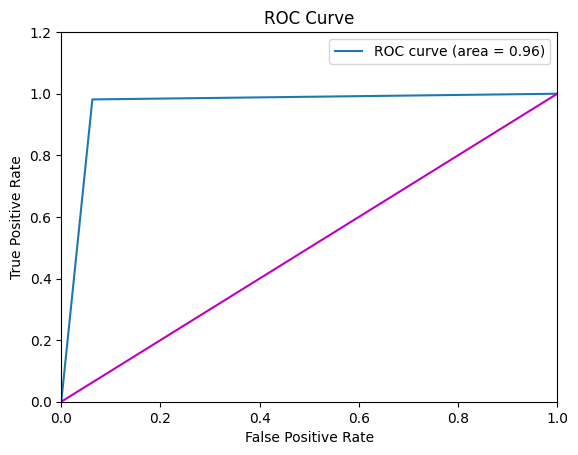

In [71]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [75]:
#Making sample prediction
user_data = np.array([[30202938,25,7,5,41,1210,1668701718,6.6,-0.2,-1,1,4,2021]])
y_pred = clf.predict(user_data)
if y_pred == 1:
    print("Won")
else:
    print("Lost")

Won
